# Unsupervised Machine Learning for Market Segmentation Project

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


### Import the dataset and check the statistics

In [113]:
creditcard = pd.read_csv('Marketing_data.csv')

In [114]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

#### Check some statistics of specific columns


In [115]:
print('Balance Avg,Min,Max =', creditcard['BALANCE'].mean(),creditcard['BALANCE'].min(),creditcard['BALANCE'].max())

Balance Avg,Min,Max = 1564.4748276781038 0.0 19043.13856


In [116]:
creditcard.describe()

# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



#### Find the row of customer with max "ONEOFF_PURCHASES" and "CASH_ADVANCE"

In [117]:
creditcard['ONEOFF_PURCHASES'].max()

40761.25

In [118]:
creditcard.loc[creditcard['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [119]:
creditcard['CASH_ADVANCE'].max()
creditcard[creditcard['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### Visualize and Explore

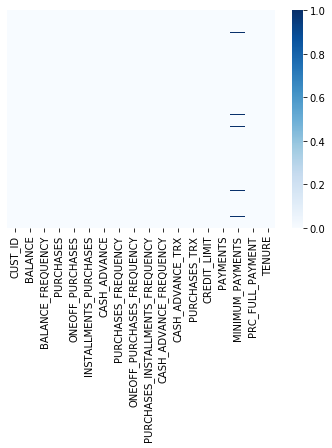

In [120]:
# check the null value by heatmap
sns.heatmap(creditcard.isnull(),yticklabels=False,cmap='Blues')

In [121]:
# check the null value by function in case there are columns with fewer null values that would not show on the heatmap
creditcard.isnull().sum()

# there are 313 null in MINIMUM_PAYMENTS and 1 null in CREDIT_LIMIT

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [122]:
# Fill up the missing elements with mean 
creditcard.loc[creditcard['MINIMUM_PAYMENTS'].isnull()==True,'MINIMUM_PAYMENTS']=creditcard['MINIMUM_PAYMENTS'].mean()

In [123]:
creditcard.loc[creditcard['CREDIT_LIMIT'].isnull()==True,'CREDIT_LIMIT']=creditcard['CREDIT_LIMIT'].mean()

In [124]:
creditcard.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

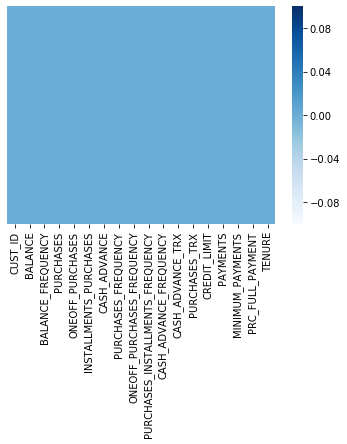

In [125]:
sns.heatmap(creditcard.isnull(),yticklabels= False,cmap ='Blues')

In [126]:
# check if there is any duplicate values 
creditcard.duplicated().sum()

0

### drop useless columns

In [127]:
creditcard.drop('CUST_ID',axis=1,inplace=True)

In [128]:
creditcard.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [129]:
n = len(creditcard.columns)
n

17

#### draw combined figures of probability density

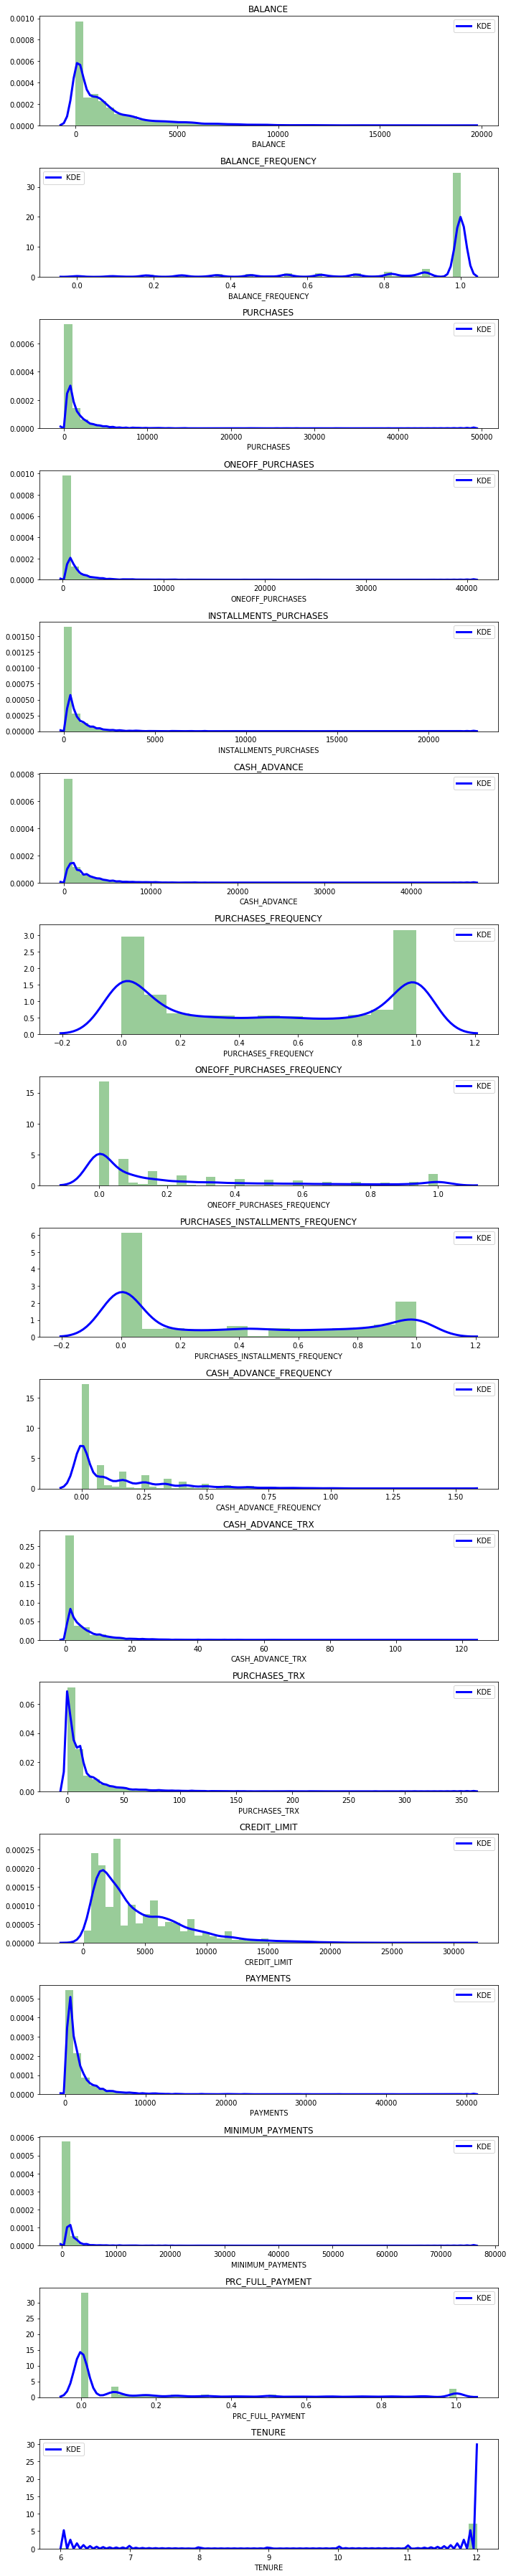

In [130]:


plt.figure(figsize=(10,50))
for i in range(len(creditcard.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard[creditcard.columns[i]],kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard.columns[i])

plt.tight_layout()





#### find the correlation and visualization

In [131]:
creditcard.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


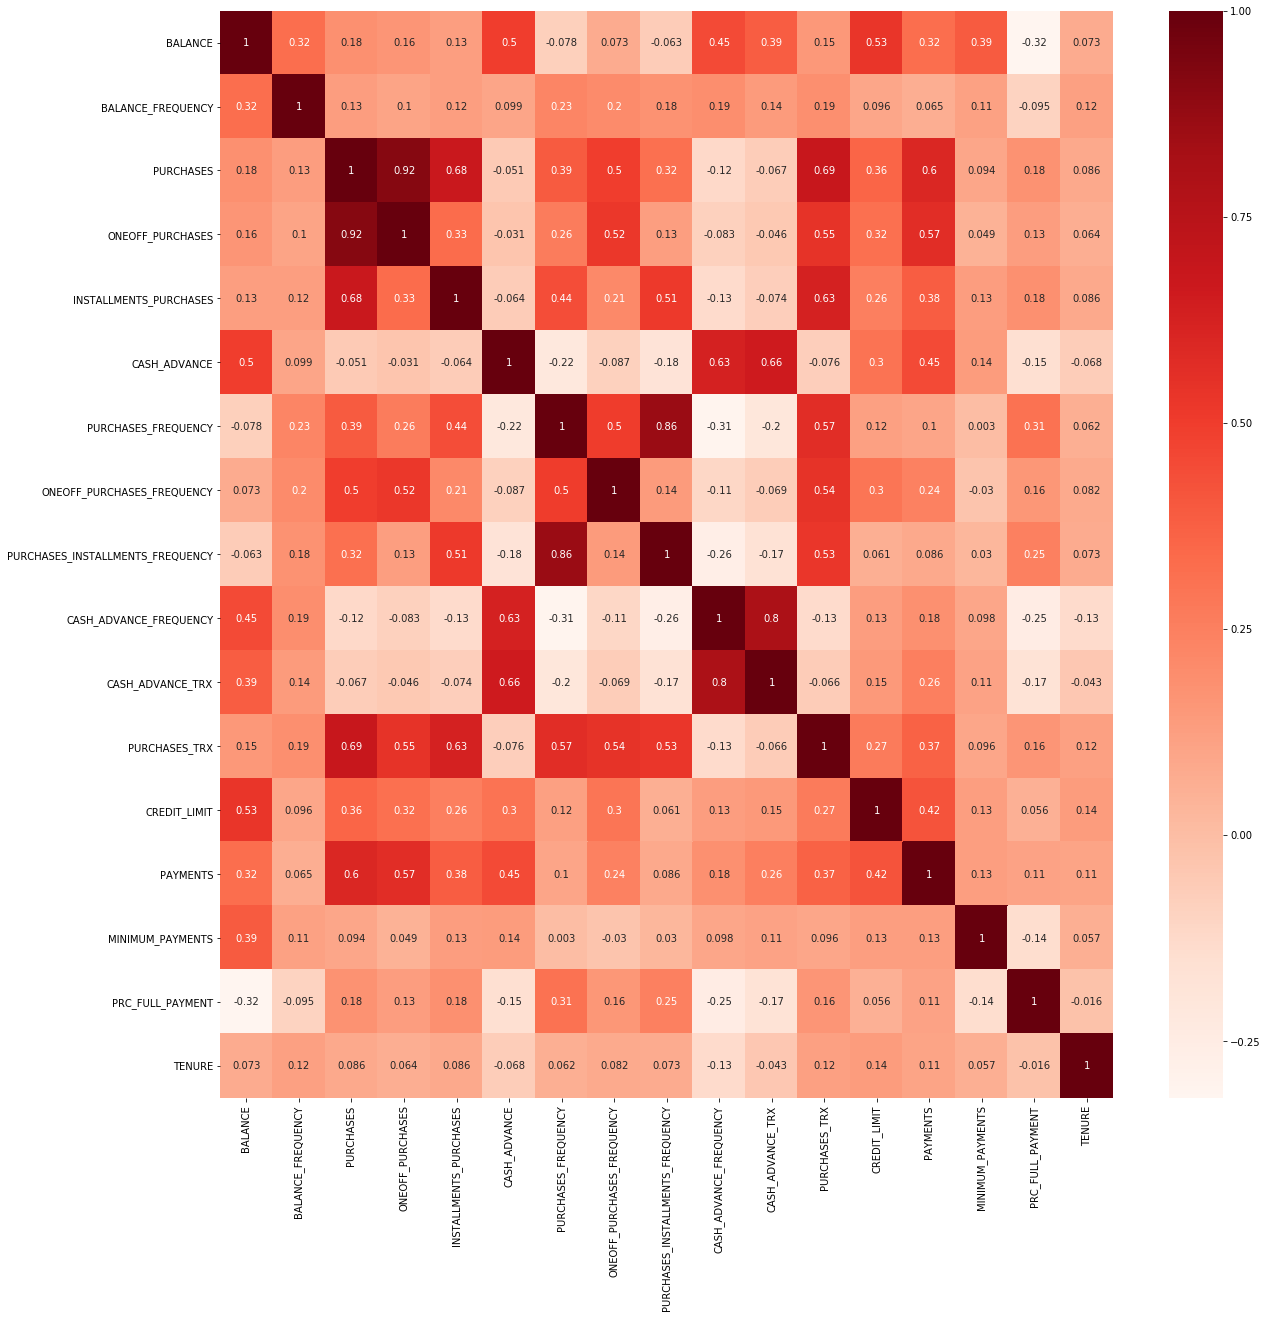

In [132]:
f, ax= plt.subplots(figsize=(20,20))
sns.heatmap(creditcard.corr(),cmap='Reds',annot=True)

## Apply K-means

#### scale the data in case the metrics are different

In [146]:
scaler = StandardScaler()
credit_scaled = scaler.fit_transform(creditcard)

In [147]:
credit_scaled.shape

(8950, 17)

In [148]:
credit_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

####  plot the 'elbow' of WSSC to find the optimal K

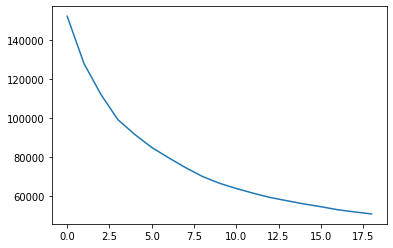

In [149]:


k_range=range(1,20)
wssc_score=[]

for i in k_range:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(credit_scaled)
    wssc_score.append(kmeans.inertia_)

plt.plot(wssc_score)

#we can see that the optimal k is between 7 and 8 accroding to the position of the 'elbow'


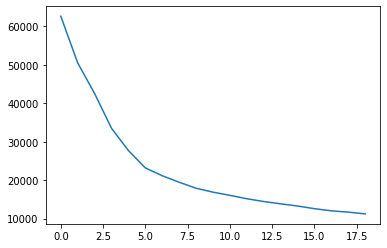

In [150]:
# try to find if the result would be different if we just use the first 7 columns

k_range=range(1,20)
wssc_score=[]

for i in k_range:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(credit_scaled[:,:7])
    wssc_score.append(kmeans.inertia_)

plt.plot(wssc_score)

# the optimal K changes to 4-5

### Apply the K-means

In [151]:
kmeans = KMeans(7)
kmeans.fit(credit_scaled)
labels = kmeans.labels_

In [160]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [152]:
labels.shape
labels.min()

0

In [153]:
labels.max()


6

In [154]:
kmeans.cluster_centers_.shape

(7, 17)

In [155]:
# find every center in dataframe
credit_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard.columns])
credit_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.007684,0.403618,-0.343515,-0.224612,-0.399476,-0.104648,-0.809326,-0.334636,-0.752644,0.084119,-0.042239,-0.464375,-0.300338,-0.248806,-0.015924,-0.452393,0.271779
1,0.137168,0.430172,0.948226,0.899832,0.588900,-0.306092,1.095828,1.867836,0.542922,-0.407205,-0.316380,1.211866,0.707776,0.398240,-0.032577,0.457030,0.307725
2,-0.370821,0.330466,-0.041414,-0.233434,0.330766,-0.368692,0.979431,-0.353950,1.170641,-0.478190,-0.362981,0.169296,-0.278435,-0.223728,-0.029251,0.307039,0.252209
3,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
4,-0.334843,-0.343573,-0.284231,-0.208737,-0.288211,0.065686,-0.197106,-0.271926,-0.229662,0.304677,-0.001695,-0.385258,-0.557568,-0.390390,-0.209717,0.013756,-3.194665
5,1.665714,0.392388,-0.206161,-0.150575,-0.210916,1.992624,-0.458722,-0.191912,-0.406287,1.909109,1.921999,-0.244401,1.007790,0.832678,0.552487,-0.391011,0.069481
6,-0.701719,-2.134810,-0.307505,-0.230900,-0.302771,-0.321909,-0.549111,-0.429500,-0.442252,-0.520230,-0.375627,-0.417099,-0.172908,-0.201909,-0.257269,0.293989,0.199793


In [157]:
# inverse the scale process to find the actual number of every column

credit_centers = scaler.inverse_transform(credit_centers)
credit_centers=pd.DataFrame(data=credit_centers,columns=[creditcard.columns])

credit_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.291174e+06,1.107738,5.763236e+05,3.651286e+05,4.546881e+04,1.593519e+06,0.556785,0.233074,0.390396,0.165556,23.452592,93.434447,1.238125e+07,2.933909e+06,1.928379e+06,0.159973,27.417175
1,3.852140e+06,1.109228,6.472733e+06,3.462884e+06,8.536990e+05,7.076446e+05,0.863668,0.429082,0.595027,0.145882,10.685664,1129.072743,2.572669e+07,8.356447e+06,1.837933e+06,0.237771,27.481553
2,1.651383e+06,1.103633,1.955325e+06,3.408252e+05,6.426140e+05,4.323548e+05,0.844919,0.231355,0.694173,0.143039,8.515452,484.937796,1.267121e+07,3.144076e+06,1.855998e+06,0.224940,27.382127
3,9.511480e+06,1.108427,3.429703e+07,1.801238e+07,4.703164e+06,2.184613e+06,0.861799,0.429644,0.673882,0.152021,23.063863,3283.158335,4.504186e+07,4.545643e+07,7.948677e+06,0.268344,27.528020
4,1.807250e+06,1.065808,8.469377e+05,4.088633e+05,1.364542e+05,2.342577e+06,0.655402,0.238655,0.473000,0.174388,25.340756,142.315857,8.976038e+06,1.747372e+06,8.758832e+05,0.199850,21.209020
5,1.047424e+07,1.107108,1.203304e+06,5.690954e+05,1.996611e+05,1.081649e+07,0.613261,0.245776,0.445102,0.238636,114.928352,229.342110,2.969829e+07,1.199724e+07,5.015437e+06,0.165224,27.054875
6,2.178354e+05,0.965288,7.407000e+05,3.478060e+05,1.245476e+05,6.380901e+05,0.598701,0.224632,0.439422,0.141356,7.926519,122.643283,1.406818e+07,3.326923e+06,6.176228e+05,0.223823,27.288255


In [166]:
y_kmeans = kmeans.fit_predict(credit_scaled)
y_kmeans = pd.DataFrame({'Cluster':labels})

In [167]:
credit_cluster=pd.concat([creditcard,y_kmeans],axis=1)

In [168]:
credit_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


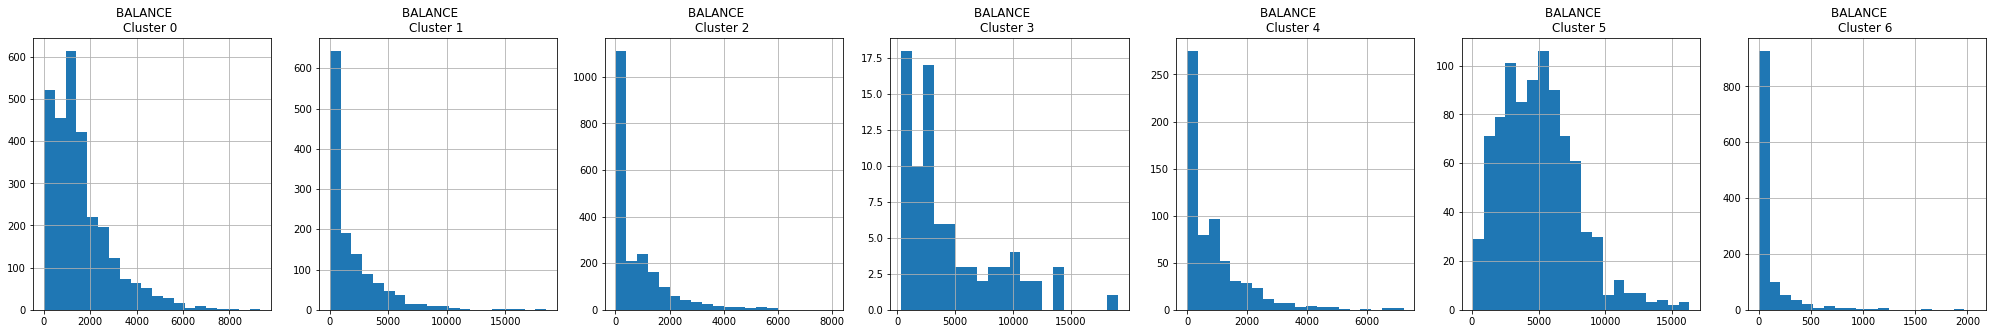

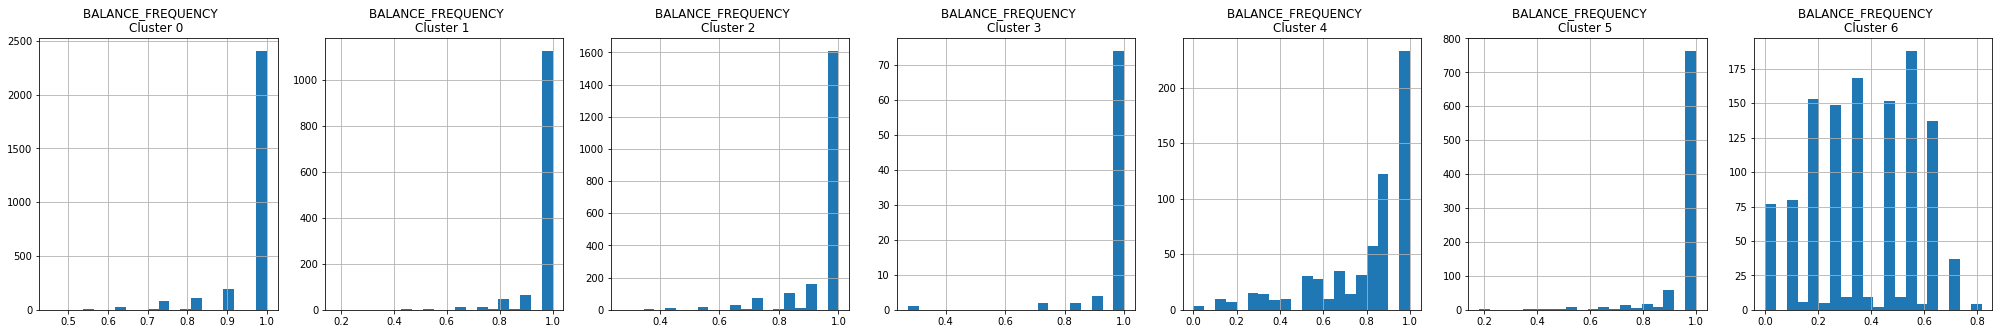

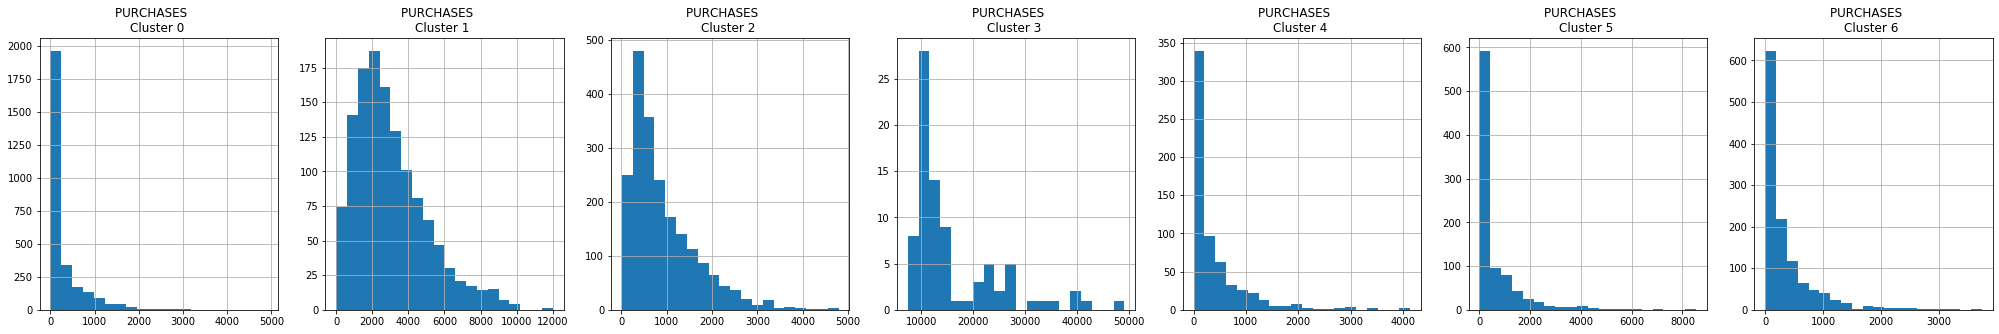

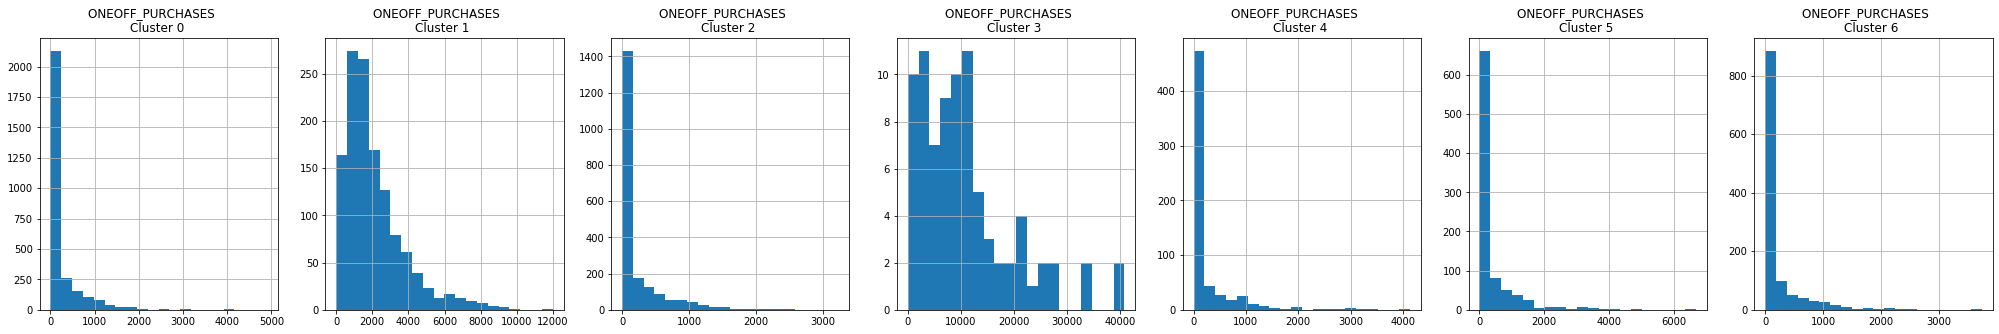

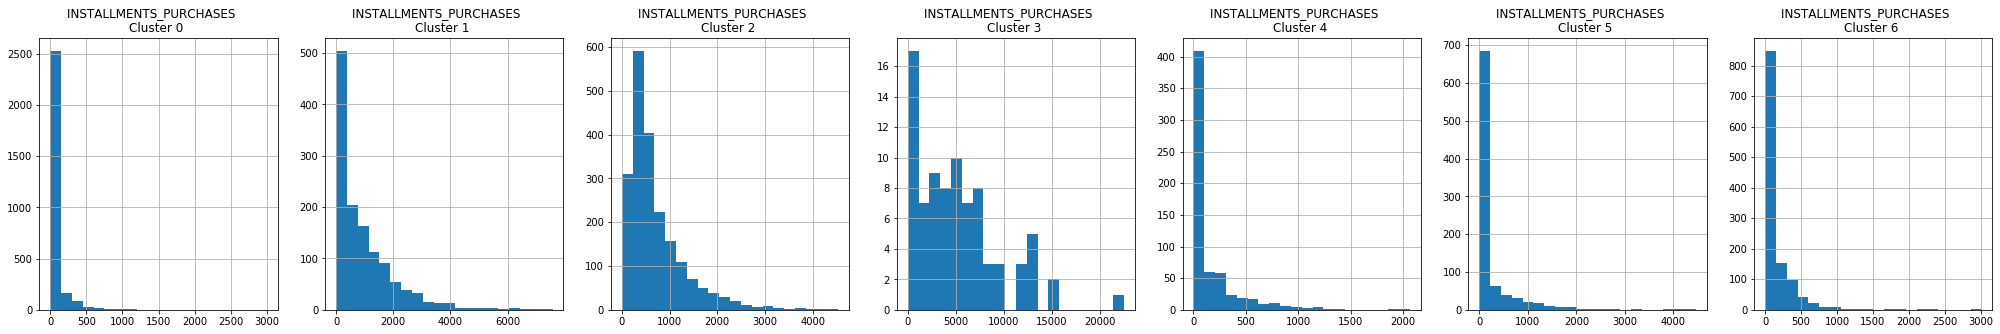

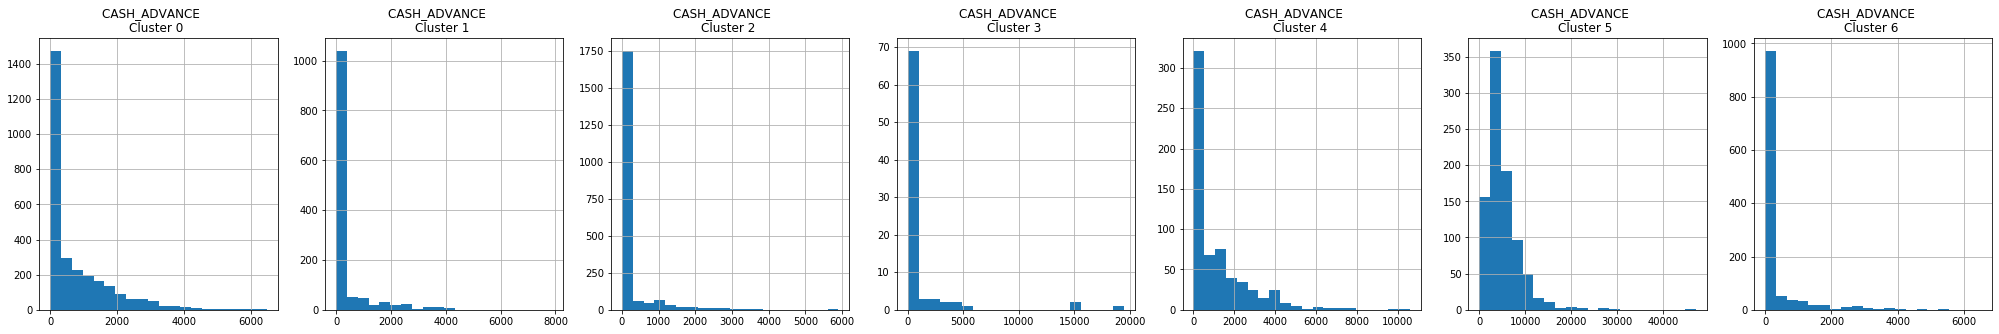

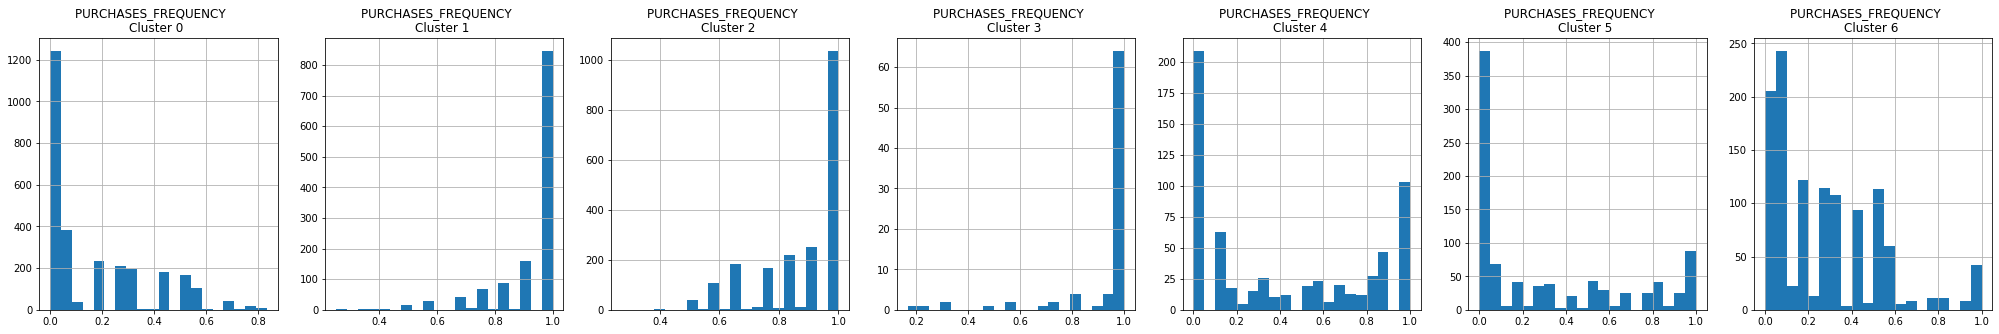

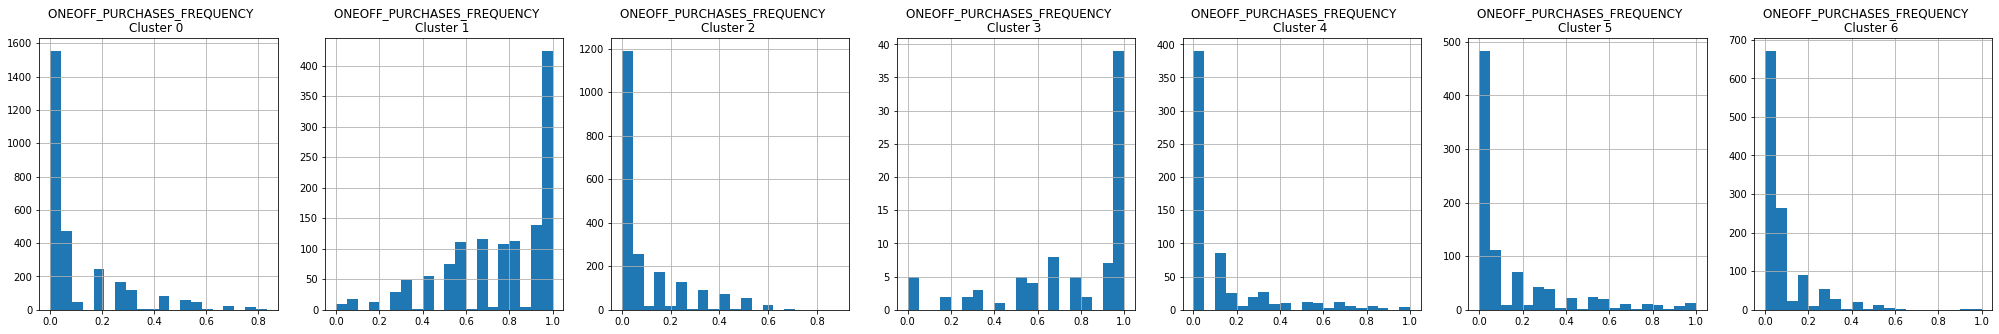

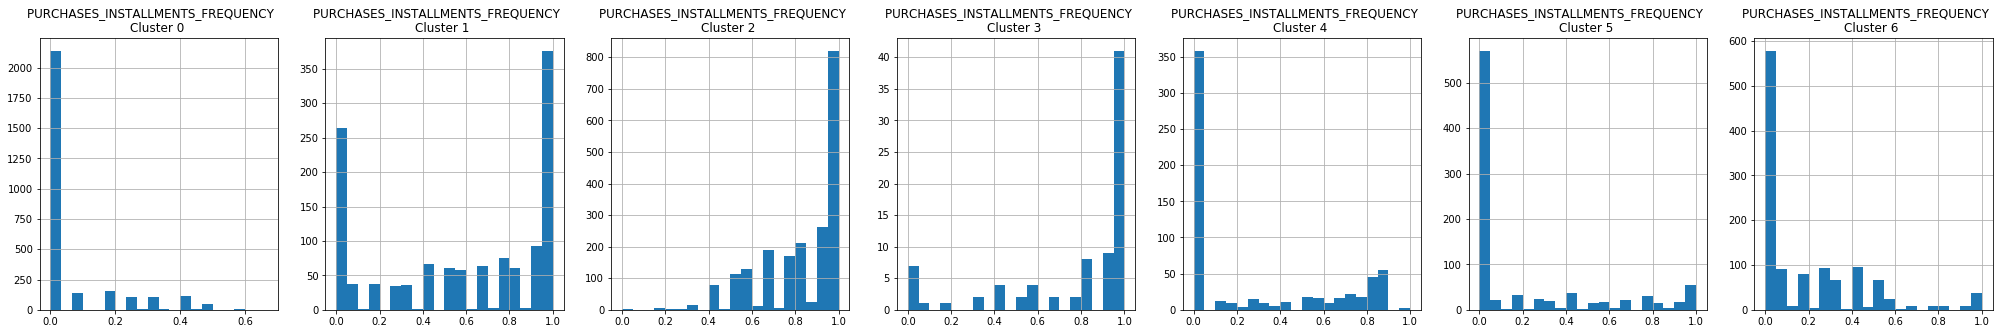

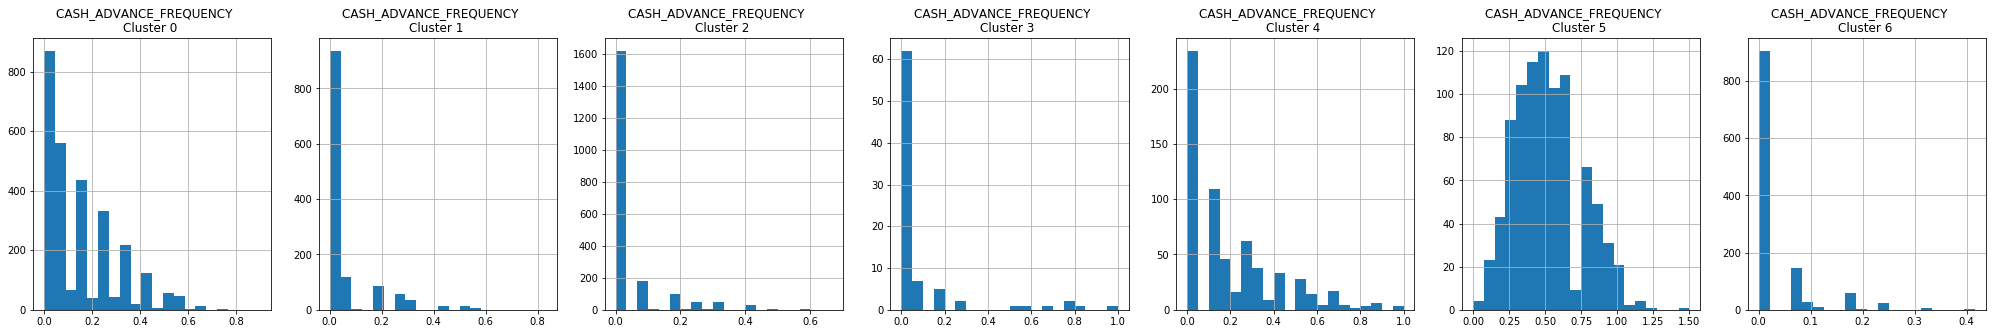

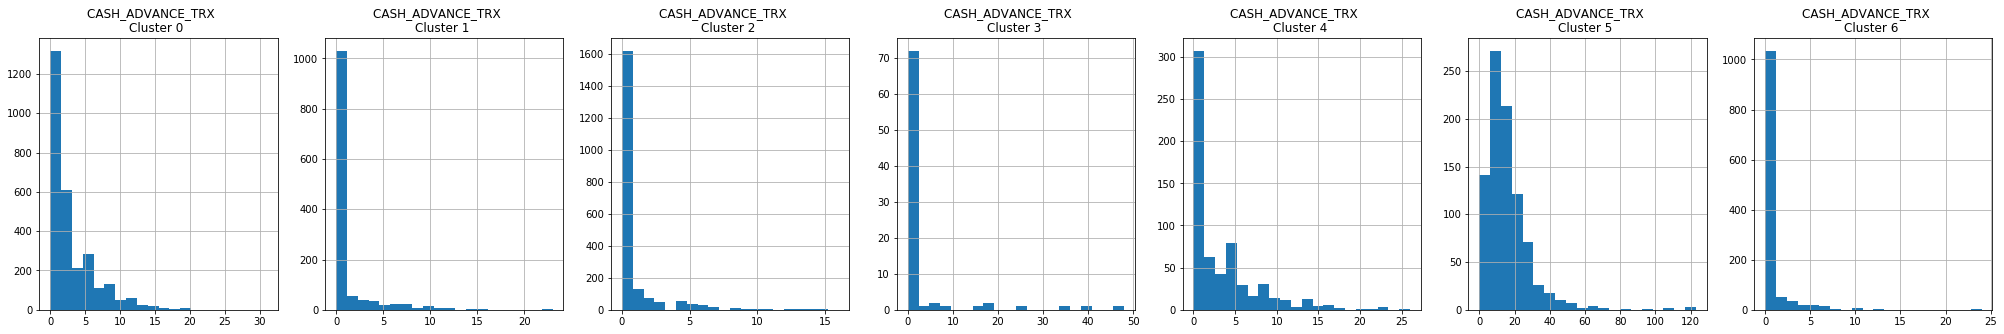

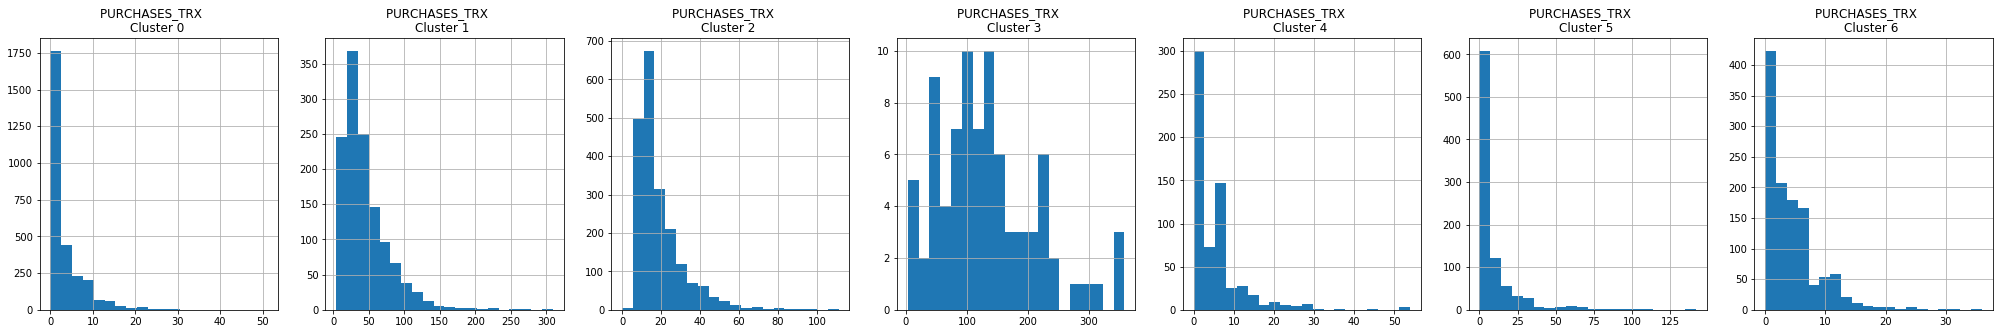

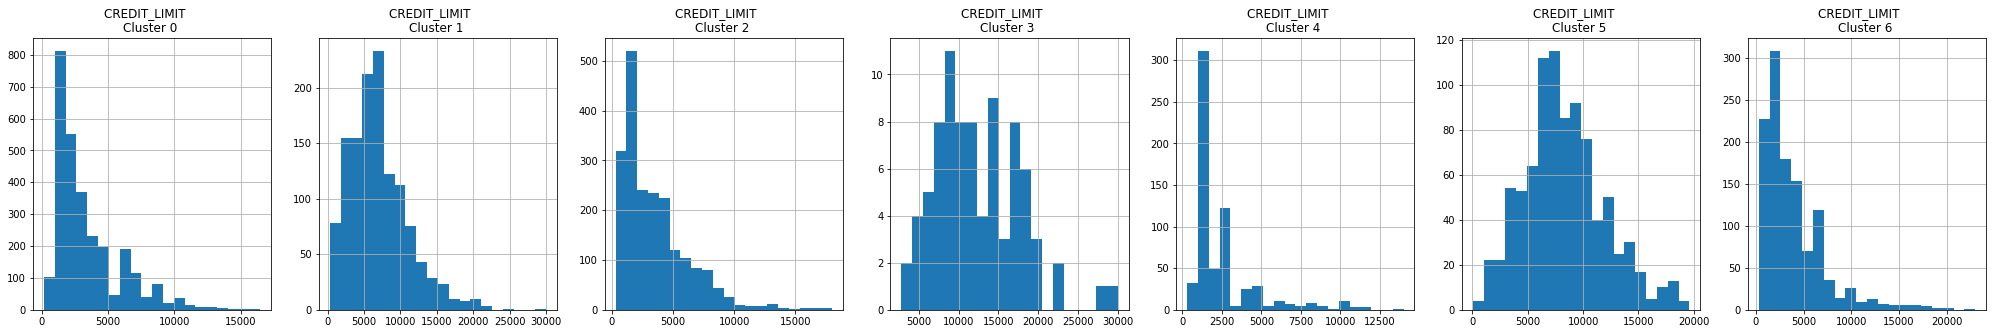

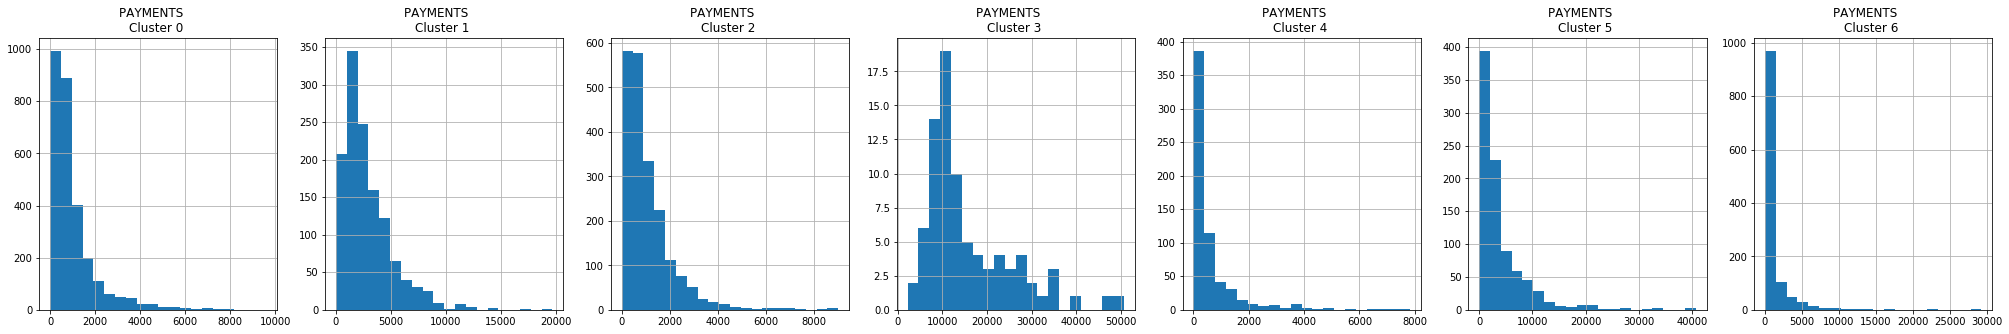

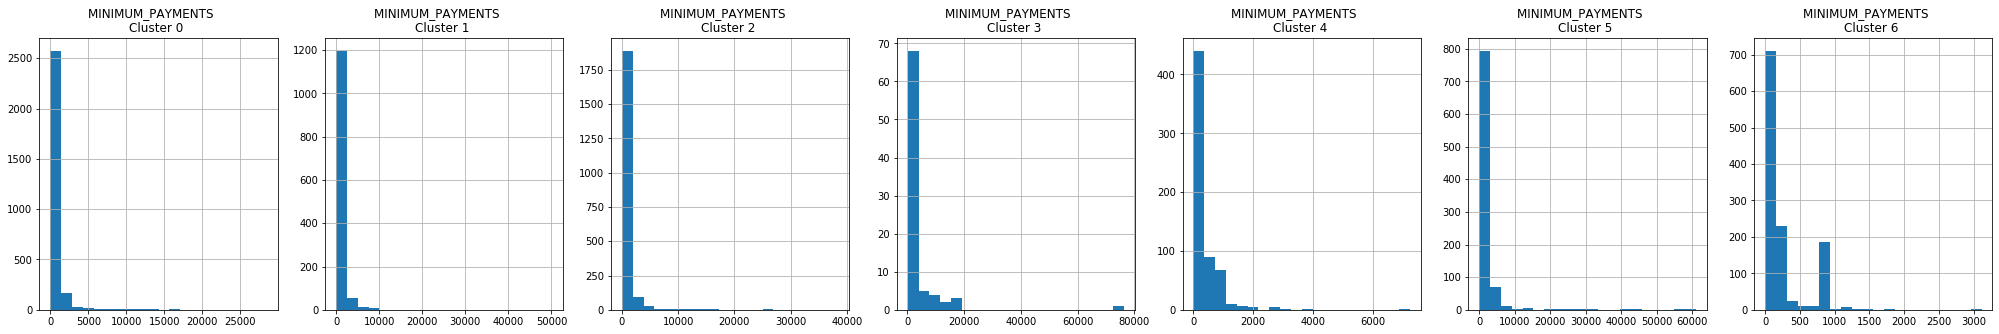

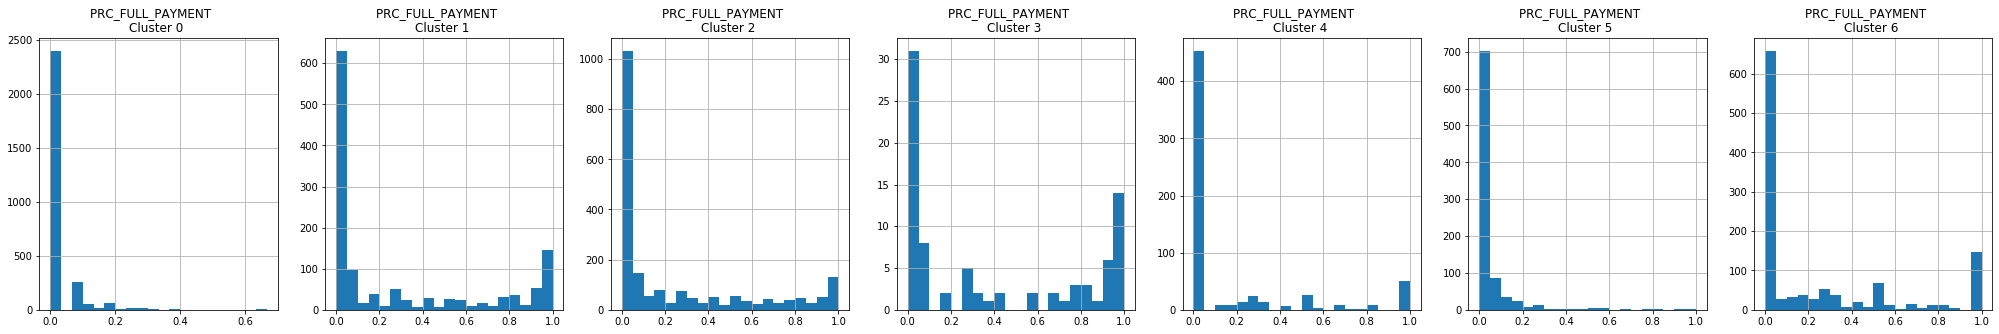

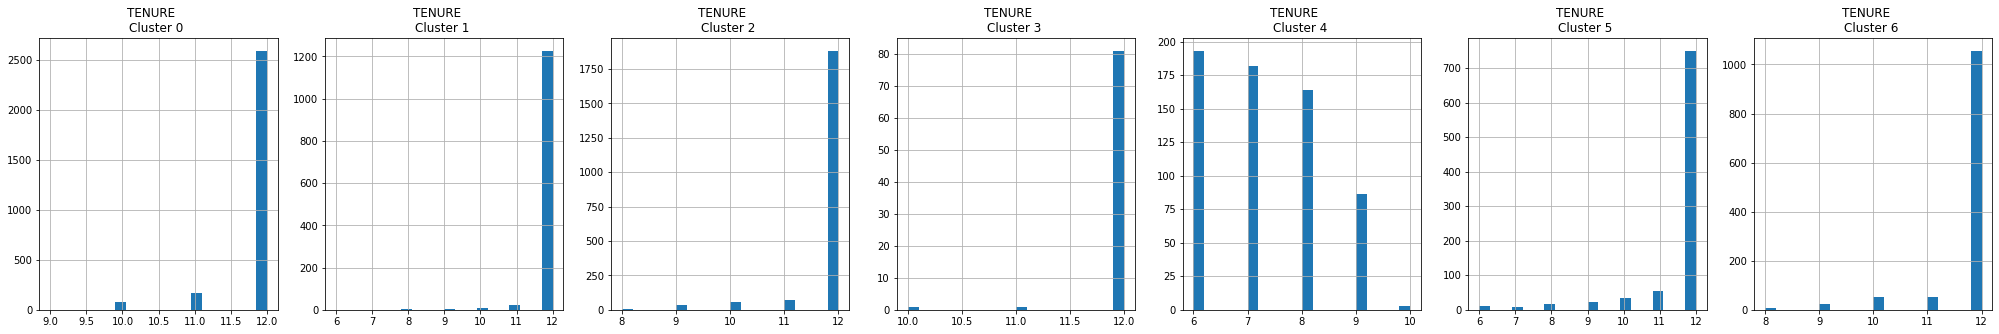

In [175]:
# Plot the histogram of various clusters

for i in creditcard.columns:
    plt.figure(figsize = (35, 5))
    for c in range(7):
        plt.subplot(1,7,c+1)
        cluster=credit_cluster[credit_cluster['Cluster']==c]
        cluster[i].hist(bins=20)
        plt.title('{}    \nCluster {} '.format(i,c))
    plt.show()








### Use PCA to reduce dimension and visulize 

In [186]:
# Obtain the principal components 
pca=PCA(n_components=2).fit_transform(credit_scaled)
pca_df=pd.DataFrame(data=pca,columns=['PC1','PC2'])
pca_df.head()

,PC1,PC2
0,-1.682221,-1.076449
1,-1.138294,2.506463
2,0.969689,-0.383524
3,-0.873630,0.043165
4,-1.599434,-0.688577


In [188]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,y_kmeans], axis = 1)
pca_df.head()

,PC1,PC2,Cluster
0,-1.682221,-1.076449,0
1,-1.138294,2.506463,5
2,0.969689,-0.383524,1
3,-0.873630,0.043165,0
4,-1.599434,-0.688577,0


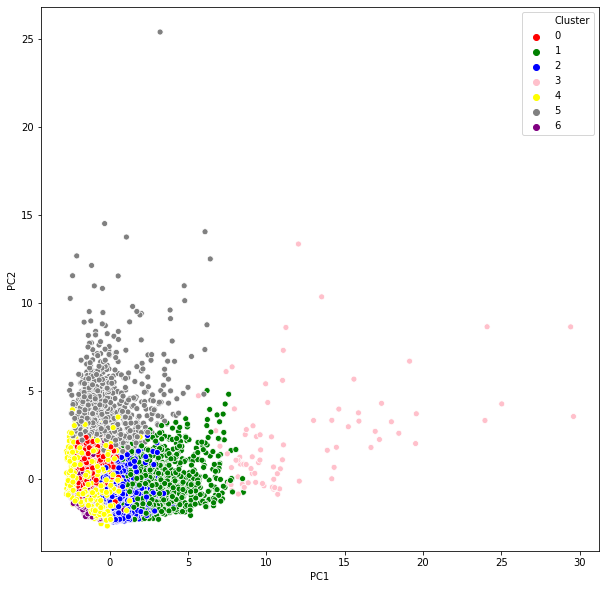

In [195]:
plt.figure(figsize=(10,10))
ax =sns.scatterplot(x="PC1", y="PC2", hue = "Cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])

plt.show()